## About the project

The goal of the project is to learn what are the factors behind the big numbers of sales, does the quality of the game affect the sales, find patterns in success of companies and to have general overview of the games sales throughout video games history.

## Data Import

Let's start off with exporting pandas .

In [1]:
import pandas as pd
import numpy as np

Now we import our csv files.

In [2]:
all_games = pd.read_csv("C:\\Users\\maxam\\Downloads\\games_sales.csv")
games_metacritic = pd.read_csv("C:\\Users\\maxam\\Downloads\\metacritic_games.csv")
games_age = pd.read_csv("C:\\Users\\maxam\\Downloads\\games_age.csv")
all_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


All sets are imported. Now we have to merge them together around titles in all_games set, as well as remove all the extras.

In [3]:
all_games = pd.merge(all_games,games_metacritic,left_on = 'Name', right_on='name', how='outer')
all_games = pd.merge(all_games,games_age,left_on='Name',right_on='name',how='outer')
all_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,user_positive,user_neutral,user_negative,user_score,name_y,platform_y,release_date_y,summary,meta_score,user_review
0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,...,97.0,37.0,2.0,8.0,Wii Sports,Wii,"November 19, 2006",Tennis (1-4 players): Players grab the control...,76.0,8.1
1,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201.0,Super Mario Bros.,GB,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,...,217.0,55.0,18.0,8.4,Mario Kart Wii,Wii,"April 27, 2008",Mario Kart Wii comes with the intuitive Wii Wh...,82.0,8.4
4,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,...,57.0,13.0,4.0,8.1,Wii Sports Resort,Wii,"July 26, 2009",Wii Sports Resort is a collection of fun sport...,80.0,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Postal III,PC,"December 21, 2011",The Postal series continues in this third inst...,24.0,3.1
95176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Game Party Champions,Wii U,"November 18, 2012",Game Party Champions is the fifth and latest i...,24.0,3.2
95177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,FlatOut 3: Chaos & Destruction,PC,"December 13, 2011",FlatOut 3: Chaos & Destruction brings a new di...,23.0,3.0
95178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21.0,2.9


## Data Cleaning

Now all_games data set became 4 times bigger. That research is based on sales more than 100_000, so we should clean those up. Also a lot of Data is being repeated now, we should clean that as well.

In [4]:
print (all_games.columns)

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'name_x',
       'platform_x', 'developer', 'publisher', 'genre(s)', 'players', 'rating',
       'attribute', 'release_date_x', 'link', 'critic_positive',
       'critic_neutral', 'critic_negative', 'metascore', 'user_positive',
       'user_neutral', 'user_negative', 'user_score', 'name_y', 'platform_y',
       'release_date_y', 'summary', 'meta_score', 'user_review'],
      dtype='object')


We see all columns. We have several "name","publisher", "platform" and "release_date", those are simply copies so we can safely remove them. "metascore" and "meta_score", "Genre" and "genre(s)", are the same columns as well. "link" and "summary" are descriptions, they will not give us any insides. "critic_positive","critic_negative","critic_neutral" and the same case for users is too much, we dont need that deep of a data for our analyziz. We will drop all of those columns.

In [5]:
all_games = all_games.drop(columns=["name_x", "platform_x","release_date_x","name_y", "platform_y","release_date_y"])
all_games = all_games.drop(columns=["genre(s)","link","publisher","summary","meta_score","user_review"])
all_games = all_games.drop(columns=["critic_positive","critic_neutral","critic_negative","user_positive","user_neutral","user_negative"])
all_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,developer,players,rating,attribute,metascore,user_score
0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo,No Online Multiplayer,E,NaN,76.0,8.0
1,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,201.0,Super Mario Bros.,GB,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo,Up to 12,E,NaN,82.0,8.4
4,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo,1-4,E,NaN,80.0,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data set became much more readable, didn't it? Time to clean up points without data regarding sales, since they are of no interest for us.

In [6]:
all_games = all_games.dropna(subset="Global_Sales")
all_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,developer,players,rating,attribute,metascore,user_score
0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo,No Online Multiplayer,E,NaN,76.0,8.0
1,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,201.0,Super Mario Bros.,GB,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo,Up to 12,E,NaN,82.0,8.4
4,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo,1-4,E,NaN,80.0,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72527,16592.0,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
72528,16593.0,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
72529,16595.0,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
72530,16596.0,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


Seems like we haven't cleaned up everything, since we have 72_532 rows when we are supposed to have 16_598, so we will do cleaning by column "Rank".

In [7]:
all_games = all_games.drop_duplicates(subset="Rank")
all_games.loc[all_games["user_score"] == "tbd"] = np.nan
all_games.loc["user_score"] = pd.to_numeric(all_games["user_score"])
all_games

C:\Users\maxam\AppData\Local\Temp\ipykernel_12044\2254850676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_games.loc["user_score"] = pd.to_numeric(all_games["user_score"])


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,developer,players,rating,attribute,metascore,user_score
0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo,No Online Multiplayer,E,NaN,76.0,8.0
1,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,201.0,Super Mario Bros.,GB,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo,Up to 12,E,NaN,82.0,8.4
4,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo,1-4,E,NaN,80.0,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72528,16593.0,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
72529,16595.0,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
72530,16596.0,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
72531,16599.0,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


## First look at data

Let's investigate the mean values of sales to help us with getting a better perspective on top sales.

In [8]:
def mean_world(all_games):
    mean_global = all_games["Global_Sales"].mean()
    mean_na = all_games["NA_Sales"].mean()
    mean_eu = all_games["EU_Sales"].mean()
    mean_jp = all_games["JP_Sales"].mean()
    mean_other = all_games["Other_Sales"].mean()
    print(f"Global sales: {mean_global}\n North America sales: {mean_na}\n Europe sales:{mean_eu}\n Japan sales: {mean_jp}\n Other world: {mean_other}")

mean_world(all_games)

Global sales: 0.5578602814749409
 North America sales: 0.2733897981277648
 Europe sales:0.15242565114948758
 Japan sales: 0.08186015411067346
 Other world: 0.04994969114181333


Mean sales are very low, only about 557_000 copies worldwide. We should see how it changes for games with 1_000_000 copies sold.

In [9]:
all_games = all_games.sort_values("Rank")
mil_sales = all_games[all_games["Global_Sales"] >=1]
mean_world(mil_sales)

Global sales: 2.75596899224807
 North America sales: 1.343730620155039
 Europe sales:0.8028875968992251
 Japan sales: 0.3507751937984472
 Other world: 0.2585998062015507


On average games that sold more than 1_000_000 copies only reach 2_755_000 sales. Let's see top sold games now.

In [10]:
all_games.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,developer,players,rating,attribute,metascore,user_score
0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo,No Online Multiplayer,E,NaN,76.0,8.0
1,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo,Up to 12,E,NaN,82.0,8.4
4,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo,1-4,E,NaN,80.0,8.1
5,5.0,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
6,6.0,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,EA Mobile,NaN,E,NaN,85.0,8.0
14,7.0,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,Nintendo,No Online Multiplayer,E,NaN,89.0,8.5
15,8.0,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Nintendo,No Online Multiplayer,E,NaN,58.0,6.5
16,9.0,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,Nintendo,No Online Multiplayer,E,NaN,87.0,8.3
17,10.0,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In top 10 games sold worldwide we have games from 28 millions sold up to 82 millions, but we can se that 82 millions sold of "Wii Sports" is a clear outlier, it has twice the sales of "Super Mario Bros." with 40 millions copies sold, although it is a second place. Let us create a scatterplot with all values of the set to get a better perspective.

Text(0.5, 0, 'Number Of Games')

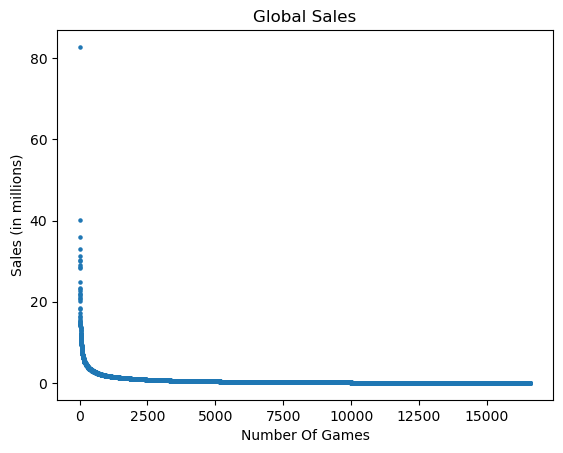

In [11]:
import matplotlib.pyplot as plt
plt.scatter(all_games["Rank"], all_games["Global_Sales"], s = 5)
plt.title("Global Sales")
plt.ylabel("Sales (in millions)")
plt.xlabel("Number Of Games")

Text(0.5, 0, 'Number Of Games')

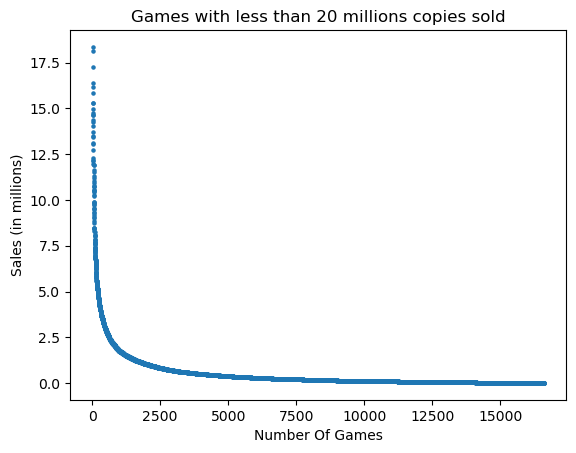

In [12]:
temp = all_games[all_games["Global_Sales"] < 20]
plt.scatter(temp["Rank"], temp["Global_Sales"], s = 5)
plt.title("Games with less than 20 millions copies sold")
plt.ylabel("Sales (in millions)")
plt.xlabel("Number Of Games")

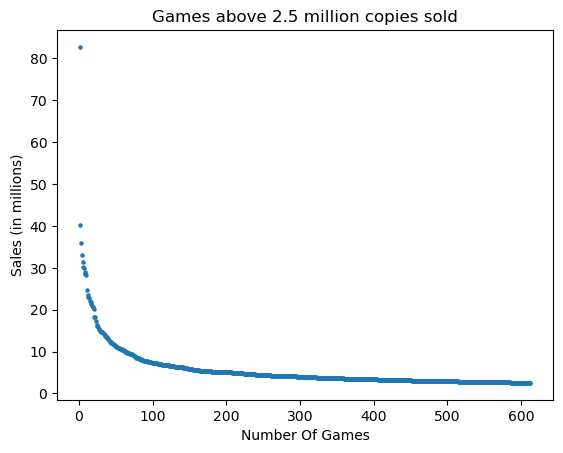

In [13]:
temp = all_games[all_games["Global_Sales"] > 2.5]
plt.scatter(temp["Rank"], temp["Global_Sales"], s = 5)
plt.title("Games above 2.5 million copies sold")
plt.ylabel("Sales (in millions)")
plt.xlabel("Number Of Games")
plt.winter()

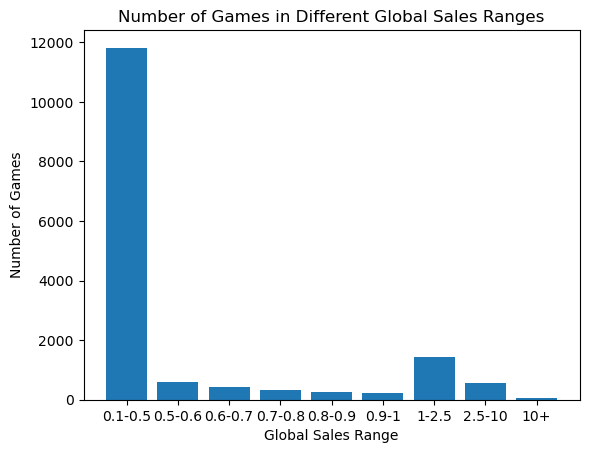

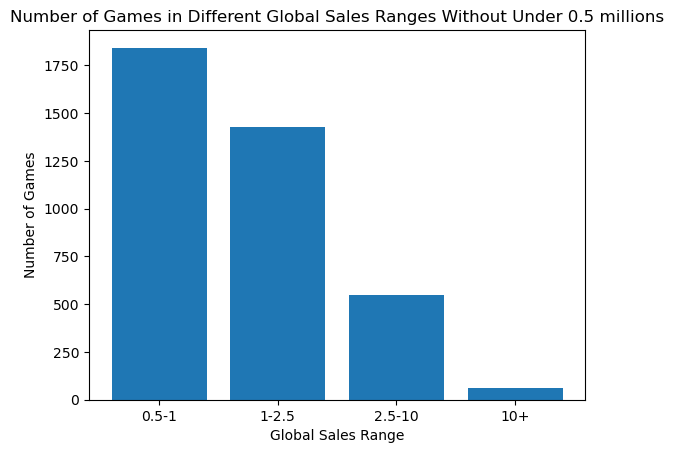

In [14]:
temp = pd.DataFrame({
    "y": ["0.1-0.5", "0.5-0.6", "0.6-0.7", "0.7-0.8", "0.8-0.9", "0.9-1", "1-2.5", "2.5-10", "10+"],
    "x": [len(all_games[(all_games["Global_Sales"] <=0.5)]),
          len(all_games[(all_games["Global_Sales"] <=0.6) & (all_games["Global_Sales"] > 0.5)]),
          len(all_games[(all_games["Global_Sales"] <=0.7) & (all_games["Global_Sales"] > 0.6)]),
          len(all_games[(all_games["Global_Sales"] <=0.8) & (all_games["Global_Sales"] > 0.7)]),
          len(all_games[(all_games["Global_Sales"] <=0.9) & (all_games["Global_Sales"] > 0.8)]),
          len(all_games[(all_games["Global_Sales"] <=1) & (all_games["Global_Sales"] > 0.9)]),
          len(all_games[(all_games["Global_Sales"] <=2.5) & (all_games["Global_Sales"] > 1)]),
          len(all_games[(all_games["Global_Sales"] <=10) & (all_games["Global_Sales"] > 2.5)]),
          len(all_games[all_games["Global_Sales"] > 10])
        ]
})

plt.bar(temp['y'], temp['x'])
plt.xlabel('Global Sales Range')
plt.ylabel('Number of Games')
plt.title('Number of Games in Different Global Sales Ranges')
plt.show()

temp1 = pd.DataFrame({
    "y":["0.5-1","1-2.5","2.5-10","10+"],#"0.9-1","0.8-0.9","0.7-0.8","0.6-0.7","0.5-0.6"],
    "x":[len(all_games[(all_games["Global_Sales"] <=1) & (all_games["Global_Sales"] > 0.5)]),
        len(all_games[(all_games["Global_Sales"] <=2.5) & (all_games["Global_Sales"] > 1)]),
        len(all_games[(all_games["Global_Sales"] <=10) & (all_games["Global_Sales"] > 2.5)]),
        len(all_games[all_games["Global_Sales"] > 10])
        #len(all_games[(all_games["Global_Sales"] <=0.9) & (all_games["Global_Sales"] > 0.8)]),
        #len(all_games[(all_games["Global_Sales"] <=0.8) & (all_games["Global_Sales"] > 0.7)]),
        #len(all_games[(all_games["Global_Sales"] <=0.7) & (all_games["Global_Sales"] > 0.6)]),
        #len(all_games[(all_games["Global_Sales"] <=0.6) & (all_games["Global_Sales"] > 0.5)])
    ]
})

plt.bar(temp1['y'], temp1['x'])
plt.xlabel('Global Sales Range')
plt.ylabel('Number of Games')
plt.title('Number of Games in Different Global Sales Ranges Without Under 0.5 millions')
plt.show()


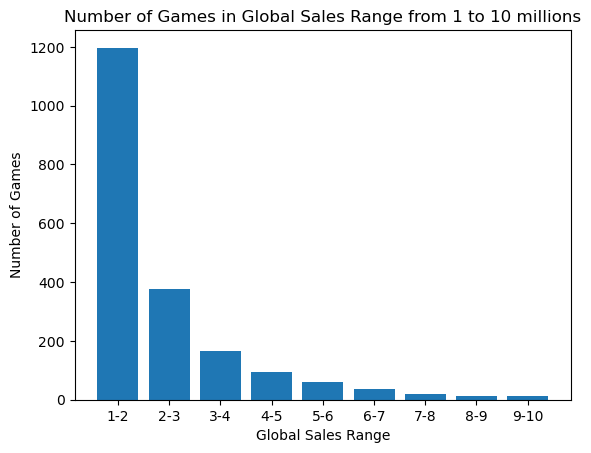

In [15]:
#temp = pd.DataFrame({"x":[],"y":[]})
x = []
y = []
for i in range(1,10):
    x.extend([len(all_games[(all_games["Global_Sales"] <= i+1) & (all_games["Global_Sales"] > i)])])
    y.extend([f"{i}-{i+1}"])
temp = pd.DataFrame({"x":x, "y":y})
plt.bar(temp['y'], temp['x'])
plt.xlabel('Global Sales Range')
plt.ylabel('Number of Games')
plt.title('Number of Games in Global Sales Range from 1 to 10 millions')
plt.show()

What can we conduct from those graphs? We can see that most of the entries in the data set have global sales less than a million, to be precise less than half a million. For the time being we should split the set in 2 : above 0.5 millions sales and udner. Since the amount of titles in 2 categories speak for themselves, we should investigate what is the reasoning behind that.

In [16]:
games_under = all_games[all_games["Global_Sales"] <= 0.5]
games_above = all_games[all_games["Global_Sales"] > 0.5]
print("Games above 0.5: ",len(games_above))
print("Games under 0.5: ",len(games_under))

Games above 0.5:  3884
Games under 0.5:  11819


## Sales by ctirics' and users' rating

Let us start the analysis by grouping games_above around the critics rating to compare it with sales


Text(0.5, 1.0, "Sales / Critics' rating")

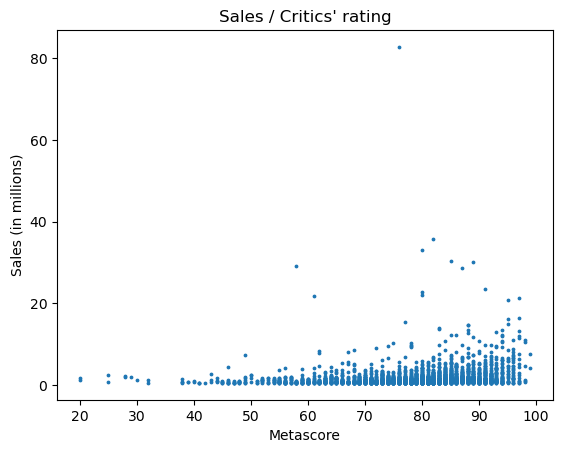

In [17]:
plt.scatter( games_above["metascore"], games_above["Global_Sales"], s = 3)
plt.ylabel("Sales (in millions)")
plt.xlabel("Metascore")
plt.title("Sales / Critics' rating")

C:\Users\maxam\AppData\Local\Temp\ipykernel_12044\2438863169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_above['user_score'] = games_above['user_score'].astype(games_above['metascore'].dtype)


Text(0.5, 1.0, "Sales / Users' rating")

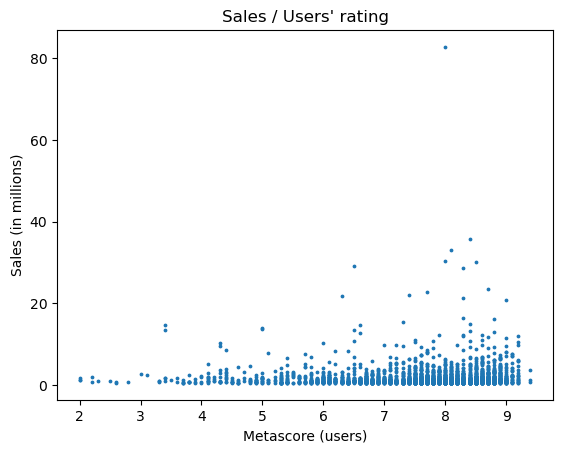

In [18]:
games_above['user_score'] = games_above['user_score'].astype(games_above['metascore'].dtype)
#games_above['user_score'] = games_above[games_above['user_score'] < 10] * 10
plt.scatter( games_above["user_score"], games_above["Global_Sales"], s = 3)
plt.ylabel("Sales (in millions)")
plt.xlabel("Metascore (users)")
plt.title("Sales / Users' rating")

As we can see according to the scatterplot games with rating as low as 20 from players and critics can still sell more than 500_000 copies. ALthough it is visible that most of them are locataed in above 50.Let's examine if generally speaking most games have rating above 50.

Text(0.5, 1.0, "Sales / Users' rating")

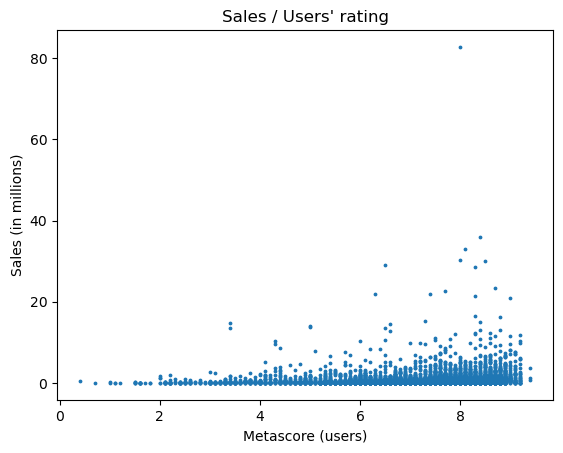

In [19]:
all_games['user_score'] = all_games['user_score'].astype(all_games['metascore'].dtype)
plt.scatter(all_games["user_score"], all_games["Global_Sales"], s = 3)
plt.ylabel("Sales (in millions)")
plt.xlabel("Metascore (users)")
plt.title("Sales / Users' rating")

As it is visible that most games are falling under 50+ categories, is there a smaller amount of games that are rated 70+ in the set of less than 500_000 copies?

C:\Users\maxam\AppData\Local\Temp\ipykernel_12044\1447523650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_under['user_score'] = games_under['user_score'].astype(games_under['metascore'].dtype)


Text(0.5, 1.0, "Sales / Users' rating")

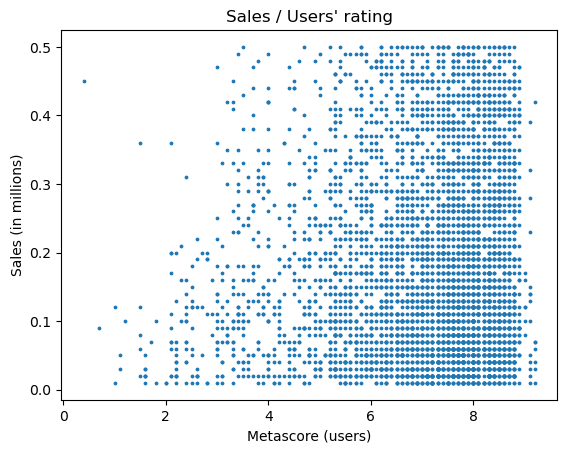

In [20]:
games_under['user_score'] = games_under['user_score'].astype(games_under['metascore'].dtype)
plt.scatter( games_under["user_score"], games_under["Global_Sales"], s = 3)
plt.ylabel("Sales (in millions)")
plt.xlabel("Metascore (users)")
plt.title("Sales / Users' rating")

Text(0.5, 1.0, "Sales / Critics' rating")

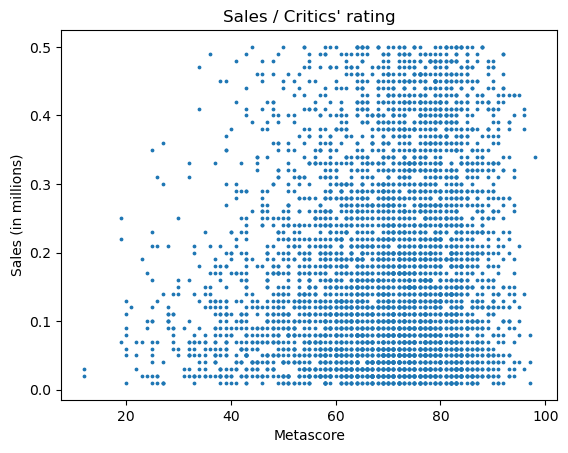

In [21]:
plt.scatter( games_under["metascore"], games_under["Global_Sales"], s = 3)
plt.ylabel("Sales (in millions)")
plt.xlabel("Metascore")
plt.title("Sales / Critics' rating")

As we can witness, games sold under 500_000 copies can still get close to a 100 rating, which leads us to a conclusion: sales have no relation with reviews. 

## Sales by age rating


rating
E       2371.66
E10+     644.67
M       1440.85
RP         0.08
T       1439.60
Name: Global_Sales, dtype: float64


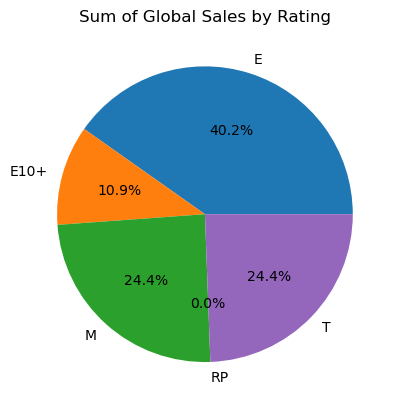

rating
E       2716
E10+    1091
M       1495
RP         3
T       2581
Name: Rank, dtype: int64


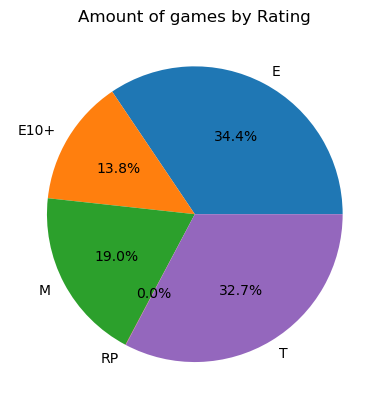

In [22]:
grouped_sales = all_games.groupby('rating')['Global_Sales'].sum()

print(all_games.groupby('rating')['Global_Sales'].sum())

# Create the bar chart for sales
plt.pie(grouped_sales, labels=grouped_sales.index, autopct='%1.1f%%')
plt.title('Sum of Global Sales by Rating')
plt.show()

print (all_games.groupby('rating')['Rank'].count())

grouped_sales = all_games.groupby('rating')['Rank'].count()
plt.pie(grouped_sales, labels=grouped_sales.index, autopct='%1.1f%%')
plt.title('Amount of games by Rating')
plt.show()

**NOTE** 

E stands for "Everyone", E10+  - "Everyone 10+", T - "Teen"(13 and above), M - "Mature"(17 and above), RP - "Rating pending". This rating guide was created by ESRB and is used in USA, Canada and Mexico. There is a bigger differentiation that is missed: A - "Adults only", RP17+ - "Rating pending - likely mature".

rating
E       0.873218
E10+    0.590898
M       0.963779
RP      0.026667
T       0.557768
dtype: float64


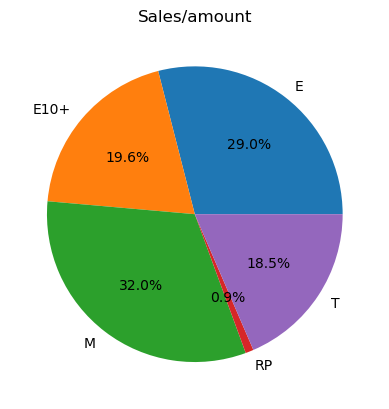

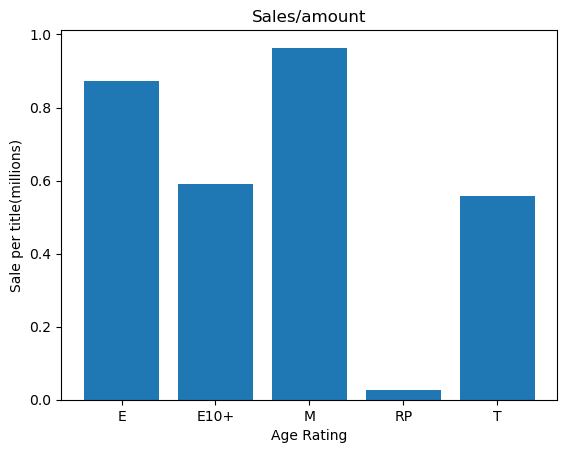

In [23]:
print(all_games.groupby('rating')['Global_Sales'].sum() / all_games.groupby('rating')['Rank'].count() )
grouped = all_games.groupby('rating')['Global_Sales'].sum() / all_games.groupby('rating')['Rank'].count()
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%')
plt.title('Sales/amount')
plt.show()

y =['E','E10+','M','RP','T']
plt.bar(y, grouped) 
plt.xlabel('Age Rating')
plt.ylabel('Sale per title(millions)')
plt.title('Sales/amount')
plt.show()

What can we get from these charts? Games from E category have the most sales and take up 40.2% of the sales, E10+ is very close category that takes 10.9% of the sales. If we combine these 2 ratings they turn out to take 51.1% of all games sales, while the rest is taken by M and T, that have the same impact on sales with 24.4% of global sales share. But this is information from only first chart, now that we add up a second to ecuation which represents the amount of titles created the lead once again is taken by E 34.4% of all games created being E rated but right behind it follows T rating with 32.7%, while M is only at 19%. Now we turn to last charts where we can see the efficency. It is clearly visible that M rated games generate the best revenue. The amount of produced games to the sales ratio is close to 1, that shows that for every M rated game sales are approaching one million copies, while E is not that far behind. E rated video games produce about 870_000 sales per game created. Lets dive deeper into these 2.

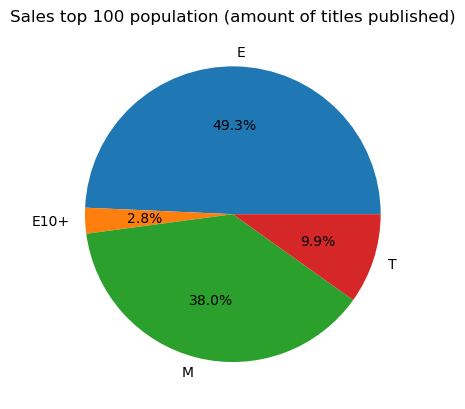

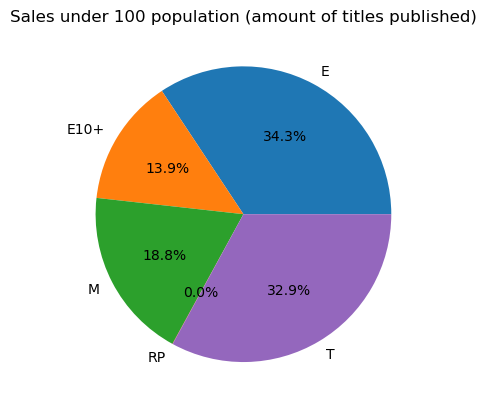

In [24]:
temp = all_games[all_games['Rank'] < 100]
grouped = temp.groupby('rating')['Rank'].count()
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%')
plt.title('Sales top 100 population (amount of titles published)')
plt.show()

temp = all_games[all_games['Rank'] >= 100]
grouped = temp.groupby('rating')['Rank'].count()
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%')
plt.title('Sales under 100 population (amount of titles published)')
plt.show()

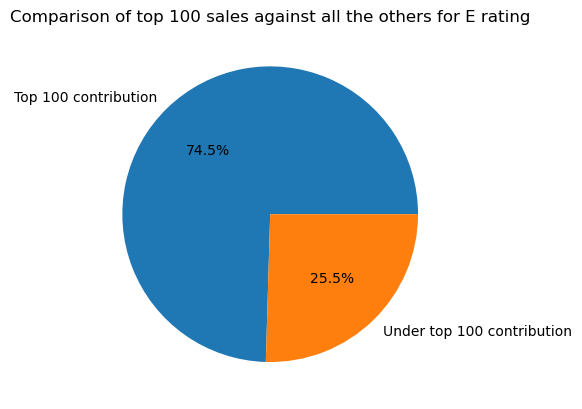

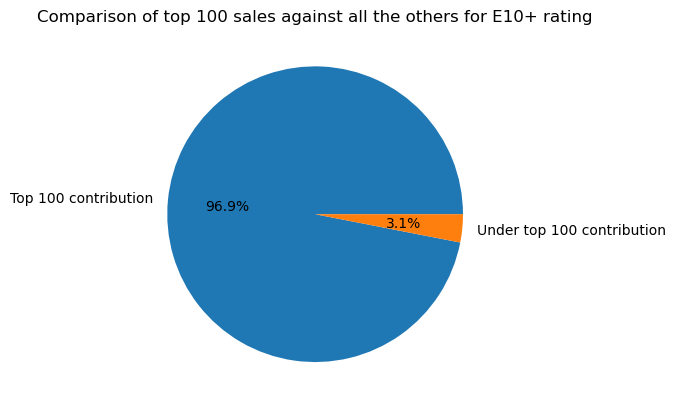

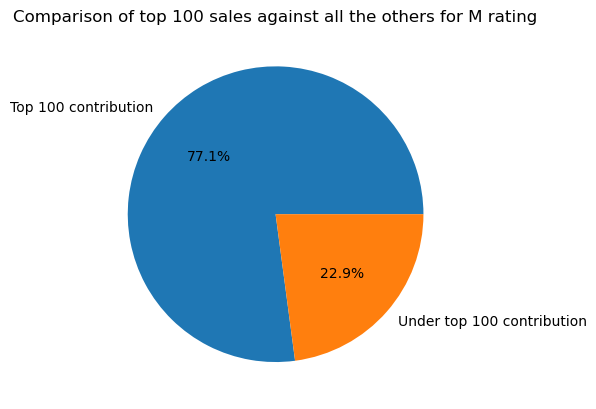

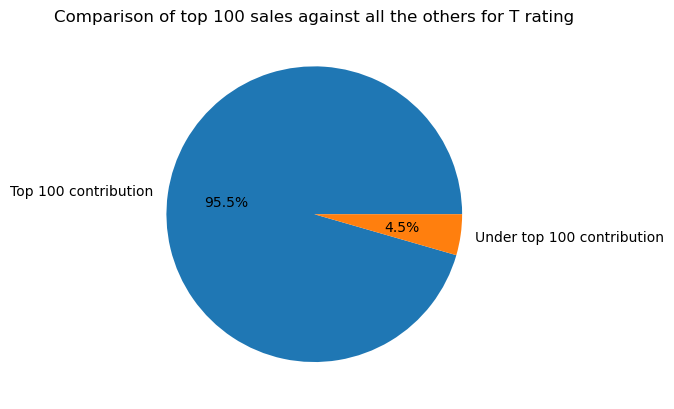

In [25]:
def partOfAllSales(string):
    if(string == 'RP'):
        return
    temp = all_games[all_games['Rank'] >= 100]
    temp = temp[temp['rating'] == string]
    temp1 = all_games[all_games['Rank'] <100]
    temp1 = temp1[temp1['rating'] == string]
    top100_sales = temp['Global_Sales'].sum()
    remaining_sales = temp1['Global_Sales'].sum()
    #print(top100_sales)
    #print(remaining_sales)
    plt.pie([top100_sales,remaining_sales], labels=['Top 100 contribution', 'Under top 100 contribution'],autopct='%1.1f%%')
    plt.title(f'Comparison of top 100 sales against all the others for {string} rating')
    plt.show()

grouped = all_games.groupby('rating')
for rating, group in grouped:
    partOfAllSales(rating)

rating
E       0.659295
E10+    0.573820
M       0.752304
RP      0.026667
T       0.534281
dtype: float64


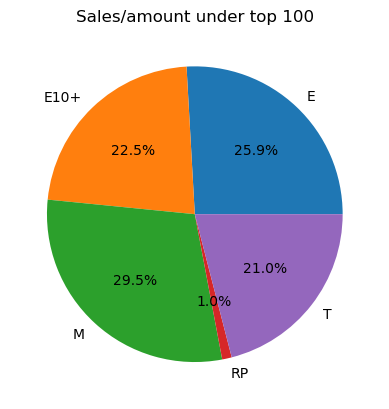

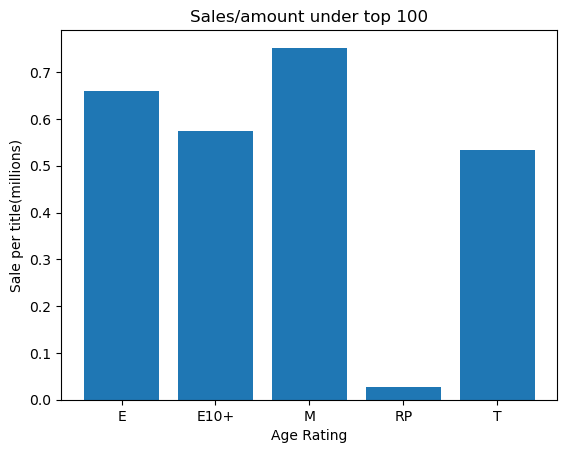

In [26]:
temp = all_games[all_games['Rank'] > 100]
print(temp.groupby('rating')['Global_Sales'].sum() / temp.groupby('rating')['Rank'].count() )
grouped = temp.groupby('rating')['Global_Sales'].sum() / temp.groupby('rating')['Rank'].count()
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%')
plt.title('Sales/amount under top 100')
plt.show()

y =['E','E10+','M','RP','T']
plt.bar( y,grouped) 
plt.xlabel('Age Rating')
plt.ylabel('Sale per title(millions)')
plt.title('Sales/amount under top 100')
plt.show()

Lets explote the graphs: At first we've found an average position of each rating in the ranking, rating M is taking a lead while E is a strong second. To get a better perspective we look into top 100 sold games. We can see that E is taking a solid first position and behind it stays M, while in under top 100 rating we see distribution as we have had seen before. That leads to a question: How big of an impact these 100 titles have? As we have seen through scatterplots there are outliers, is it possible that they make the rating stand out? Could this be a cause for rating E to take almost 50% of a marketshare? Graphs of cmoparison show us, that for ratings E10+ and T more than 90% of the global sales are made in top 100, while the rest have barely anything to do with the success of the category. At the same time M and E once again stand out. While they have an outstanding perfomance in top 100 it doesnt stop just there. Big amount of sold copies were brought in from under top 100. What's more astonishing is the fact that M has overall smaller amount of titles, that is well represented in the last section of graphs. M rating shows great perfomnce outside of top 100 and now it is safe to safe that according to data, the probability of selling the most copies of a game are laying within M rated games. It is followed by E, after that E10+ and very close to it T. RP is umrepresentetive rating that should be ignored.

## Sales by genres

So far into analysis we have figuered out that surprisingly neither users' score nor critics' rating have no correlation with the sales while age rating certantly provides an impact on the amount of copies going off the shelf. While games rated for everyone dominate the market by their sales and the amount produced, mature games bring in more revenue per game, but what if all of this is connected through a different way? Are there genres that sell more? Are those genres related to the age rating which causes the success of this ratings. Let's start first by exploring the sales within genres and later on we will connect them with the age rating.

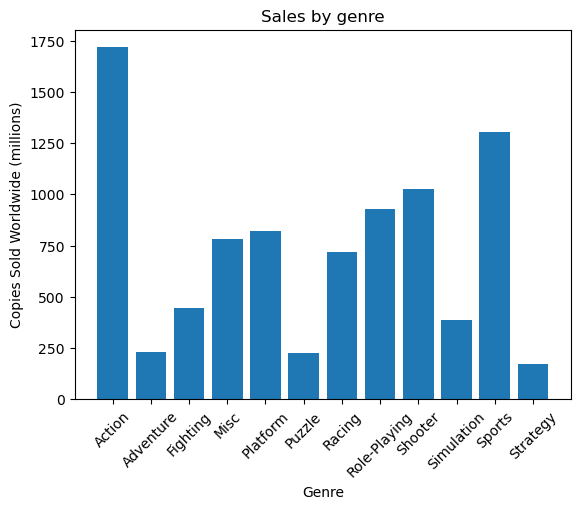

In [27]:
grouped = all_games.groupby('Genre')['Global_Sales'].sum()
plt.bar( grouped.index,grouped) 
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Copies Sold Worldwide (millions)')
plt.title('Sales by genre')
plt.show()

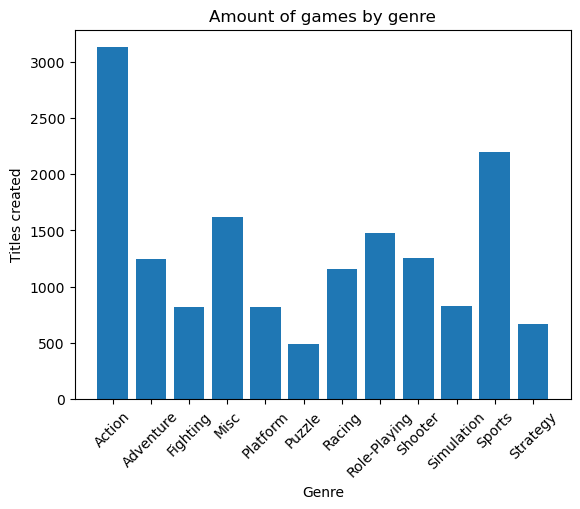

In [28]:
grouped = all_games.groupby('Genre')['Global_Sales'].count()
plt.bar( grouped.index,grouped) 
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Titles created')
plt.title('Amount of games by genre')
plt.show()

What can we read from this graphs? Amount of sold copies is proportional to the amount of titles created: the more created the more sold, but there are genres tha dont fit this description: "Adventure" has a lot of titles created when the sales can not keep up to this proportion; "Platform" on the other hand has just the half of the titles created of "Misc" while at the same time overperfoming it. Let's what genre has the best ratio of sold copies/title.

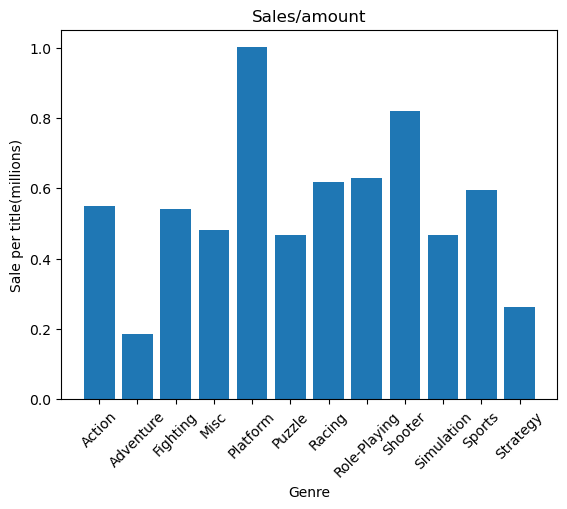

In [29]:
grouped = all_games.groupby('Genre')['Global_Sales'].sum() / all_games.groupby('Genre')['Rank'].count()
plt.bar(grouped.index, grouped) 
plt.xlabel('Genre')
plt.ylabel('Sale per title(millions)')
plt.xticks(rotation=45)
plt.title('Sales/amount')
plt.show()

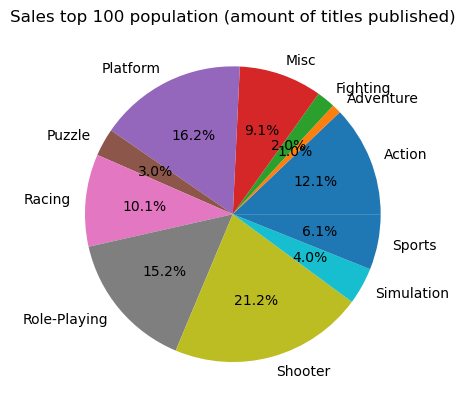

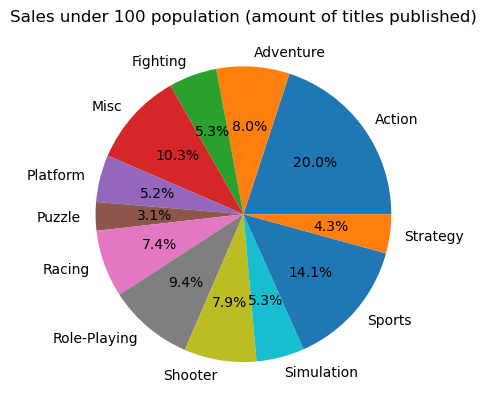

In [30]:
temp = all_games[all_games['Rank'] < 100]
grouped = temp.groupby('Genre')['Rank'].count()
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%')
plt.title('Sales top 100 population (amount of titles published)')
plt.show()

temp = all_games[all_games['Rank'] >= 100]
grouped = temp.groupby('Genre')['Rank'].count()
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%')
plt.title('Sales under 100 population (amount of titles published)')
plt.show()

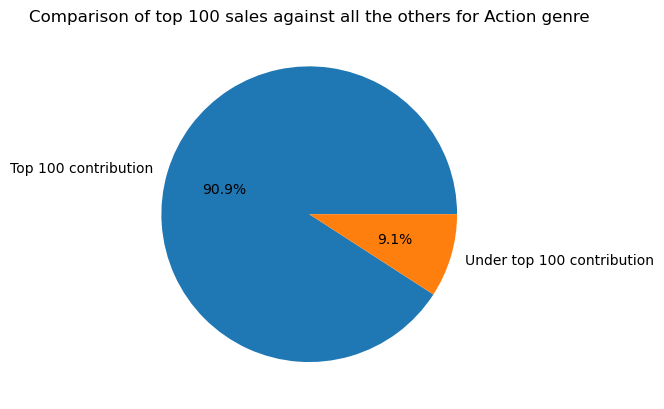

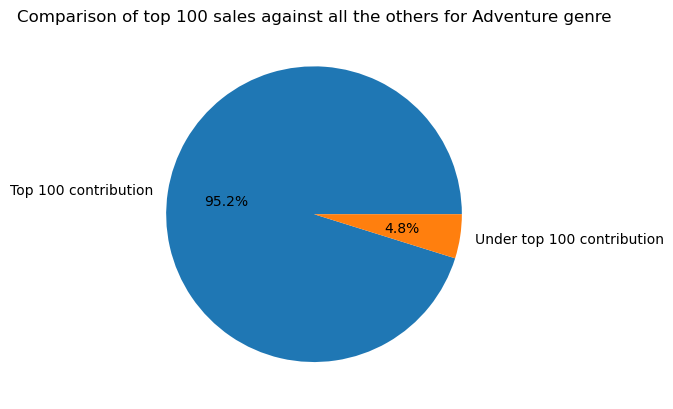

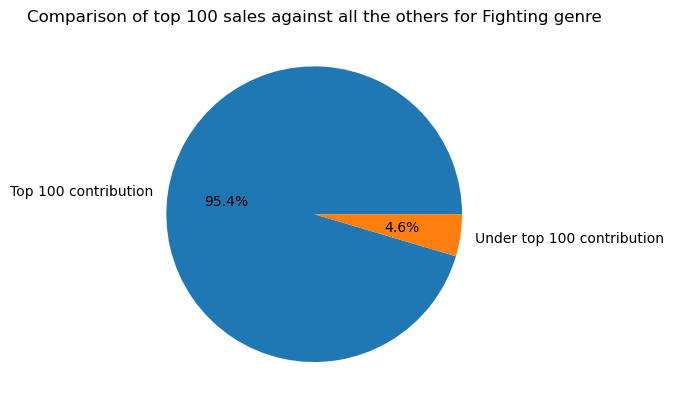

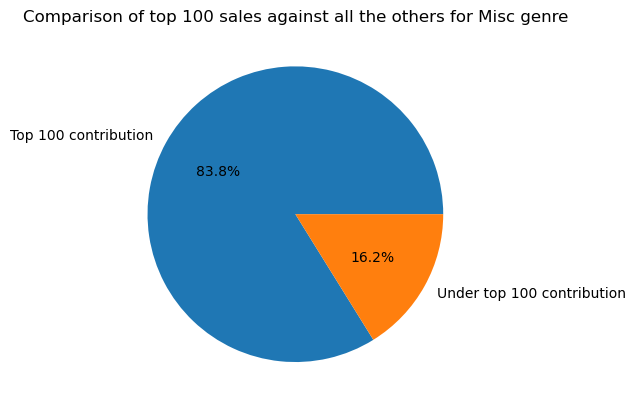

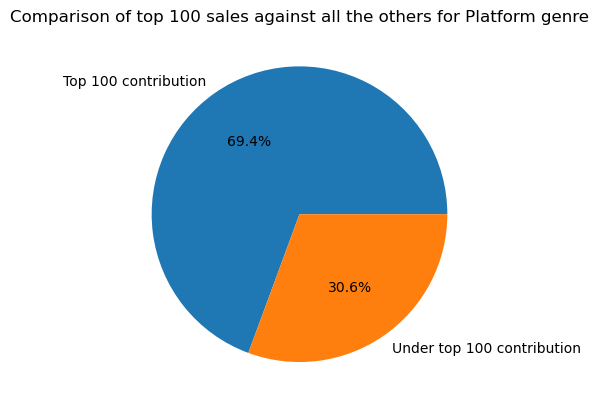

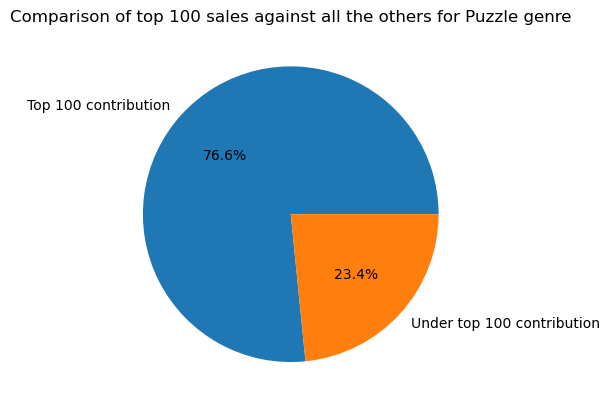

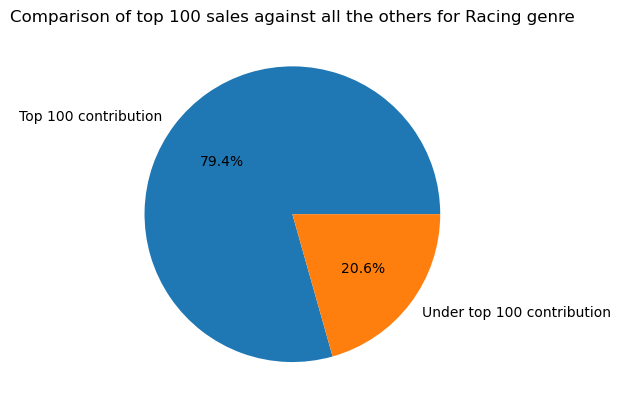

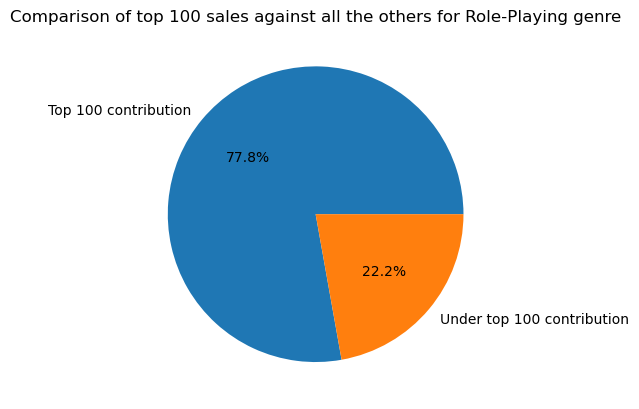

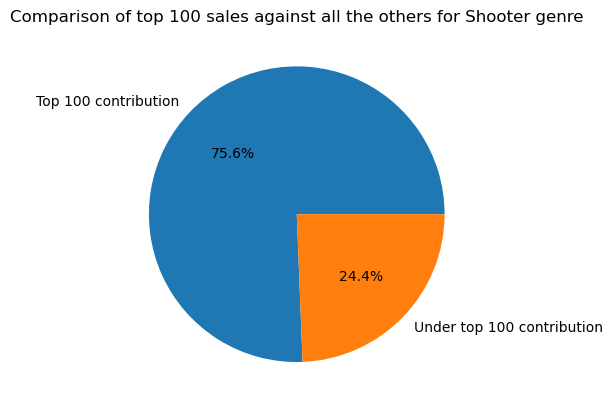

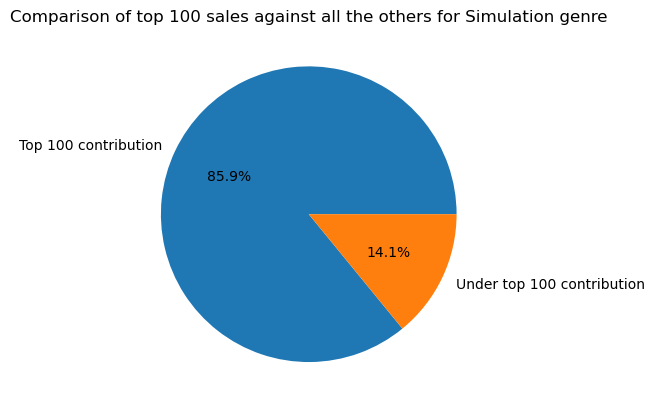

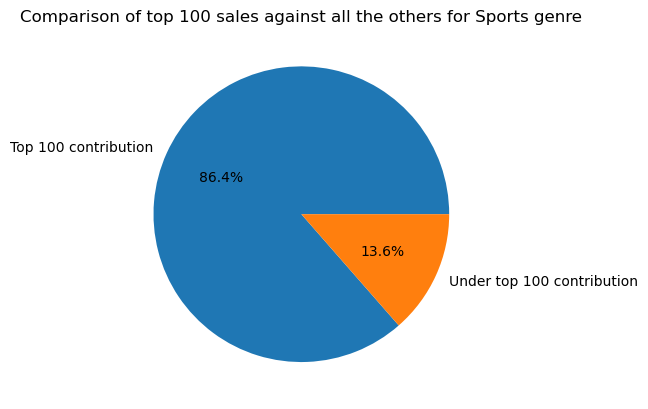

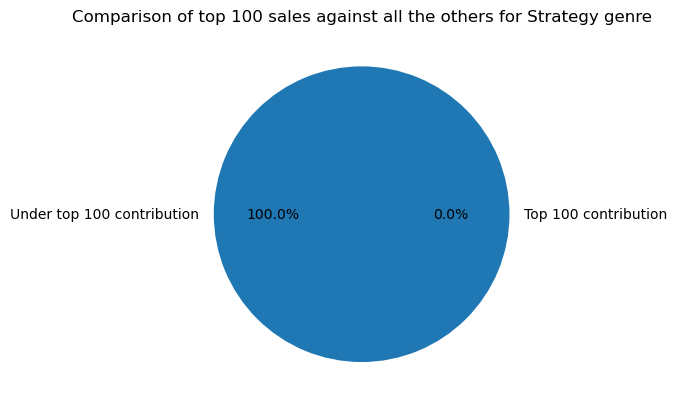

In [31]:
def partOfAllSalesGenreScatter(string):
    temp = all_games[all_games['Genre'] == string]
    plt.scatter( temp["Global_Sales"], temp["Genre"], s = 5)
    plt.title(f"Sales for {string} genre")
    plt.xlabel("Sales (in millions)")
    plt.ylabel("Number Of Games")
    plt.show()
    
def partOfAllSalesGenre(string):
    if(string == 'RP'):
        return
    temp = all_games[all_games['Rank'] >= 100]
    temp = temp[temp['Genre'] == string]
    temp1 = all_games[all_games['Rank'] <100]
    temp1 = temp1[temp1['Genre'] == string]
    top100_sales = temp['Global_Sales'].sum()
    remaining_sales = temp1['Global_Sales'].sum()
    #print(top100_sales)
    #print(remaining_sales)
    if (string != 'Strategy'):
        plt.pie([top100_sales,remaining_sales], labels=['Top 100 contribution', 'Under top 100 contribution'],autopct='%1.1f%%')
    else: 
        plt.pie([top100_sales,remaining_sales], labels=['Under top 100 contribution', 'Top 100 contribution'],autopct='%1.1f%%')
    plt.title(f'Comparison of top 100 sales against all the others for {string} genre')
    plt.show()
    #partOfAllSalesGenreScatter(string)



grouped = all_games.groupby('Genre')
for rating, group in grouped:
    partOfAllSalesGenre(rating)

The data tells us that "Strategy" as a genre can not show very high sales and it stays in the are of aproximately 300_000 sold copies per title.That is almost the same for the "Adventure" genre, but not quite. While sales of both are on pair with each other, there's a crucial problem that "Adventure" has. "Strategy" has steadily grown it numbers of sales wih the best outcomes above 5 millions, while the "Adventure" best selling game was at 10 million mark. "Adventure" has outdone "Strategy", but at the same time there is less titles in "strategy" genre and it represents a more stable perfomance. Overall those two genres are the most struggling once that perform the poorest.
"Puzzle" and "Simulation" are on the same level as "Strategy" selling wise, but because of sales/titles ratio they stand out, because they are on the same level with the ratio as the leader of the chart: "Action". To be more precise they are on the average level of the market. It is a clear sign that there is potential in the market, that hasn't been discovered yet. "Puzzle" and "Simulation" low levels of sales are definetly not signs of a low interest to them from players. PLayers are as interested in them as in "Action" games, which have flooded the market.
But there are 2 genres that stand out the most: "Platform" and "Shooter". Both styles have a great ratio of sales/titles. The sales are not the first ones in line, but there's clearly a demand for them. Not only with a ratio of sales/titles "Platform" stands out, it as well stands out with the sales contribution of top 100 games. It has 30.6% of all sales contributed from games under top 100. That is an outstanding perfomance. It tells us about the sales that "Platform" genre can guarantee doesn't lie only in top 100 games realm, but also in a lower scale projects.
At this point we can define 3 groups of genres:
1. Biggest payback: Platform, Shooter
2. Safe option: Action, Fighting, Misc, Puzzle, Racing, Role-playing, Simulation, Sports
3. High risk: Adventure, Strategy

## Genres and Age rating

Let's go back, previously we have discovered that M rated games have the best perfomance sale wise according to the amount of titles published. Can this be the reasoning of having a spesific popular genre dedicated spesifically to this rating? Are genre sales in any way related to the age category?

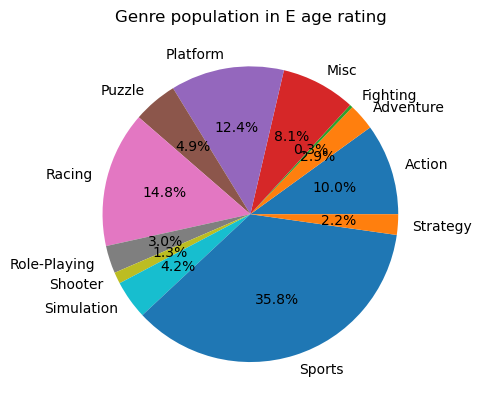

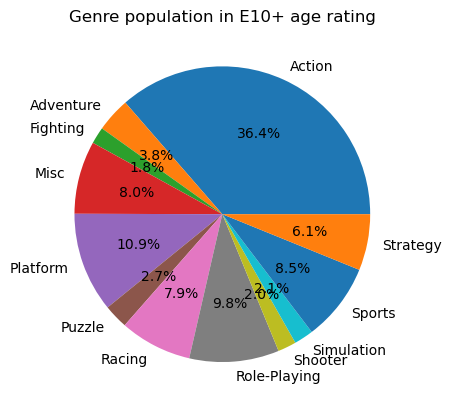

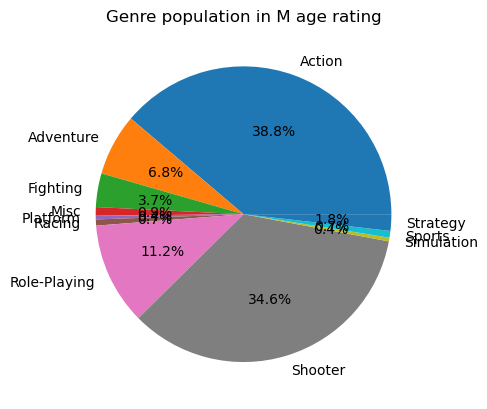

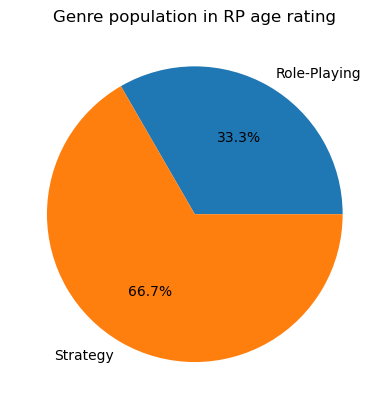

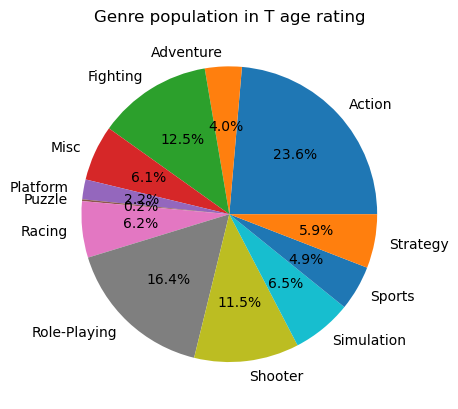

In [32]:
def partOfAllSalesGenreAndRatingCount(string):
    temp = all_games[all_games['rating'] == string]
    grouped = temp.groupby('Genre')['Rank'].count()
    plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%')
    plt.title(f'Genre population in {string} age rating')
    plt.show()

grouped = all_games.groupby('rating')
for rating, group in grouped:
    partOfAllSalesGenreAndRatingCount(rating)

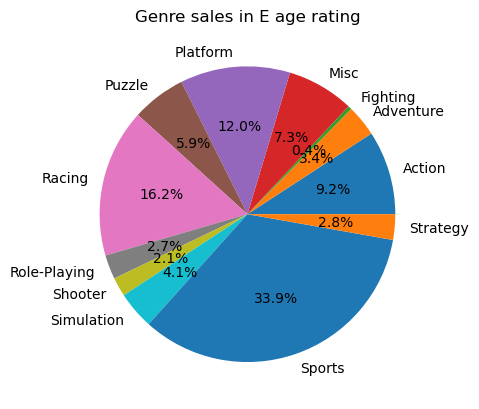

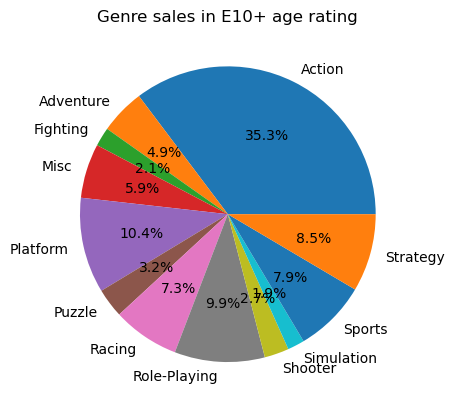

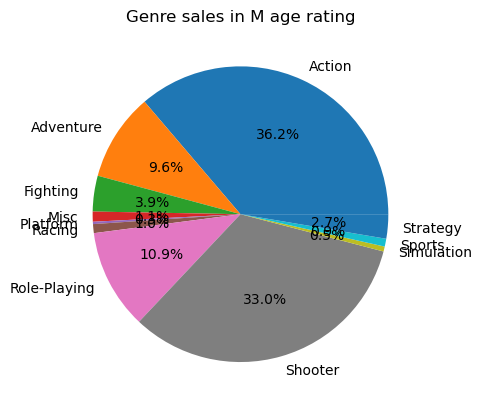

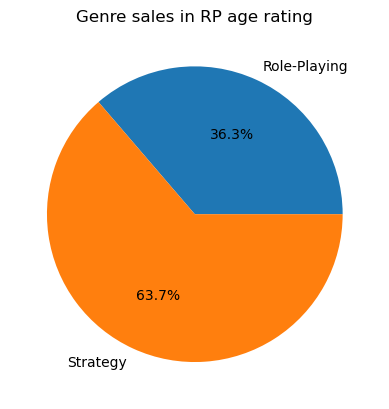

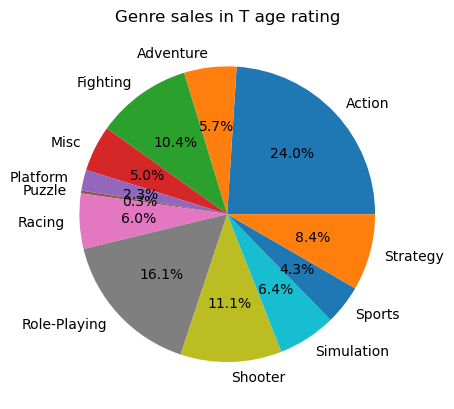

In [33]:
def partOfAllSalesGenreAndRatingSum(string):
    temp = all_games[all_games['rating'] == string]
    grouped = temp.groupby('Genre')['Rank'].sum()
    plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%')
    plt.title(f'Genre sales in {string} age rating')
    plt.show()

grouped = all_games.groupby('rating')
for rating, group in grouped:
    partOfAllSalesGenreAndRatingSum(rating)

Let's take a look at every Genre closer:
- **Action**: the most popular genre. Being the leader in sales and amount of games created in it provides medioucre perfomance, with sales per title being average. It has the lowest contribution to E rating with least games created for it, at the same time,  sales wise as well, falling behind and this trend is applicable to M and E10+ ratings, although publishing wise it's consuming a big share. Only for T rating "Action" shows good sales comparing to the amount produced but barely.
- **Adventure**: the most uderperformed genre. While having lots of titles created lacks selling potential. It perfoms poorly for all ratings but has the most potential with M or T ratings.
- **Fighting**: lower mediocracy. Sales and publishing amounts are low, sales per title are on the average level. The genre does not stand out in sales nor in perfomance. It is unpopular to create but when a title is created it tends perform on the same level as most. It is very unrepresented for E rating and mostly targeted at T, unfortunatelly failing to contribute to the overall revenue of the rating although having a decent share of production. It has a minimum success for other ratings.
- **Misc**: uncertain medium. Genre meaning: "A catch-all category for video games that nobody has any clue how to categorize.". Including many absolutely different games has an average share of market as well as production. The relation between sales to the amount published is slightly lower than a mean value of the market. It is very unrepresented in M category but is a solid part of E and E10+, showing the worst perfomance in E10+ and slightly lower than medium in E. In T cateogory being one of the lowest represented genres still has a normal share although perfomance wise falls behind.
- **Platform**: the best performer. Genre with the best sales/produced perfomance. Having a little amount of games produced success of each more likeable than any other genre. Extremly unrepresented in M rating, for T rating situation is better but the contribution to rating's success is minimal. For E and E10+ is one of the stables with stable and solid contribution.
- **Puzzle**: low sales as well as production. Unpopular genre with sales ratio under medium. The low production and as result low sales. Extremly unrepresented in M and T ratings, but on the other hand, while still a small represantation in E and E10+, a great contribution to the sales of the rating.
- **Racing**: average genre. All the data regarding the genre stays at the medium: sales, production amount, perfomance. Very unrepresented in M rating, while for E10+ and T stays on the normal contribution. It has a great perfomance in E with a medium amount of titles and a great contribution to the sales.
- **Role-Playing**: "suitable for all" genre. Having average sales, produced amount and perfomance has a significant role for all age ratings besides E. Being unpopular for E it performs above expectations in it, as well as for M where the market share several time higher. It is a solid part of the market, especially for T being the second most sold genre in the rating.
- **Shooter**: M rating stable. While this genre is very unrepresented for E and E10+, it shines in M raing with taking 1/3 of the market for this rating. Although it is the third most popular genre for T, it is undeniable that M has monopoly in the shooter genre. It is clear to say that this monopoly helps M rating have such an outstanding perfomance with that little amount of titles produced.
- **Simulation**: weak nische. Spesifically targeted at T rating falls in perfomance. Small production and small sales do not allow the genre to get out of it's nische. Underrepresented in M and E10+, while having a small represenation in E i still fails to deliver a valueable impact on the market share.
- **Sports**: E rating stable. Being the second most sold genre it is very spesifically targeted at E rating. Being the biggest on the market for E it slightly fails to perform, having smaller sales impact than the amount of titles created. It is suprising considering the general perfomance above average. It is extremly unrepresented for M, but has a great perfomance for T. E10+ and "Sports" relation stay at the norm, with a medium perfomance as well as the titles created.
- **Strategy**: dark horse. While it's sales are at extreme low they do not do justice to the genre. It has a great potential, although being a nische. While underperfoming in every rating there is one that stands out for it: E10+. The genre could be aiming at the wrong audience since most of the games are targeted at T rating, it perfomance stands out in E10+, that could be a big breakthrough for the genre. 

## Publishers
There exist a lot of publishers in the gaming industry. Some of them stay local while the most target bigger audience, audience worldwide. Who are the top publishers? What are the genres that they publish and do they have an effect on the success of a company? Does the variety of genres help company's perfomance? What about target customer: do companies that focus on E rated games have a better perfomance than M focused ones? We will answer those question in this section.

Since there is a lot of small publishers that have unsignificant impact we will mark them as others. All publishers with impact less than 1% fall under the category.

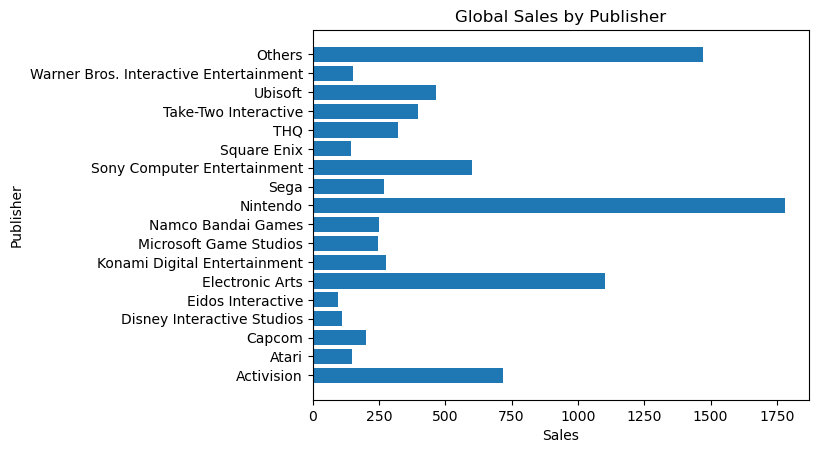

In [34]:
grouped = all_games.groupby('Publisher')['Global_Sales'].sum()
total_sales = grouped.sum()
threshold = 0.01  # 1%
filtered_grouped = grouped[grouped / total_sales >= threshold]
other_sales = total_sales - filtered_grouped.sum()
temp = pd.DataFrame(filtered_grouped)
temp.loc['Others'] = other_sales
plt.barh( temp.index,temp['Global_Sales']) 
#plt.xticks(rotation=-90)
plt.xlabel('Sales')
plt.ylabel('Publisher')
plt.title('Global Sales by Publisher')
plt.show()

There are 2 obvious leaders: Nintendo, Electronic Arts. Right behind them go: Activision, Sony and Ubisoft. What do these company do that make them stand out? Let's see in what genres they work.

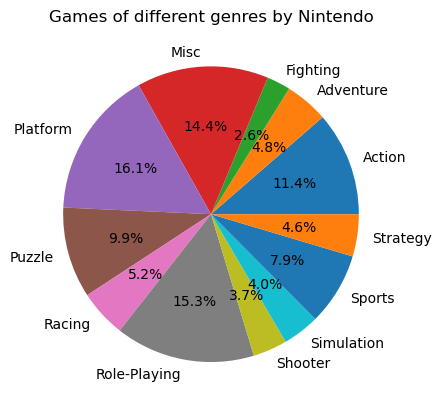

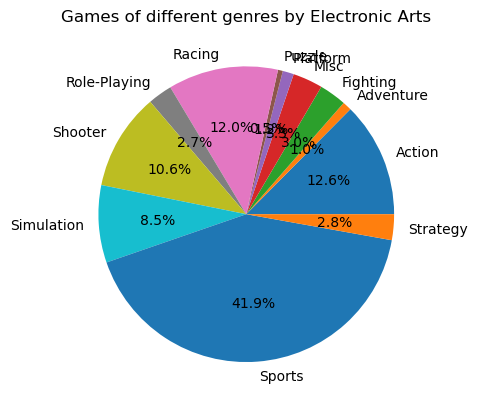

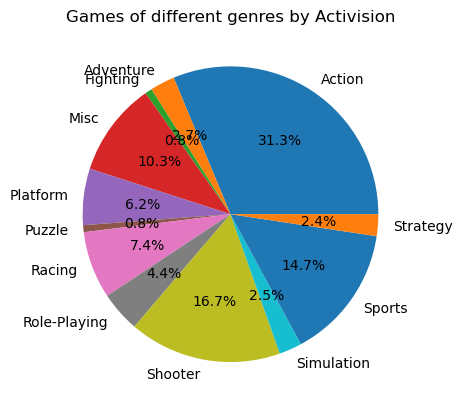

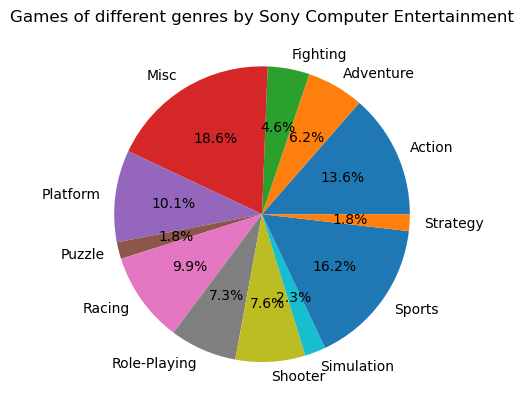

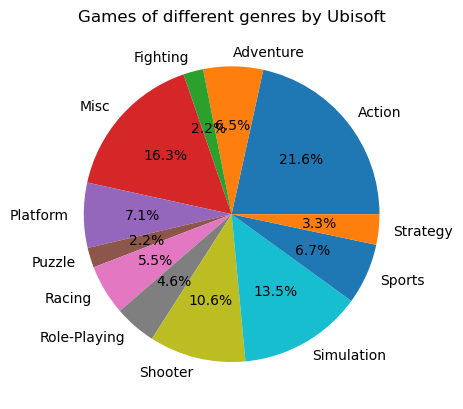

In [35]:
def GenresPublisher(string):
    temp = all_games[all_games['Publisher'] == string]
    grouped = temp.groupby('Genre')['Rank'].count()
    plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%')
    plt.title(f'Games of different genres by {string}')
    plt.show()

GenresPublisher('Nintendo')
GenresPublisher('Electronic Arts')
GenresPublisher('Activision')
GenresPublisher('Sony Computer Entertainment')
GenresPublisher('Ubisoft')

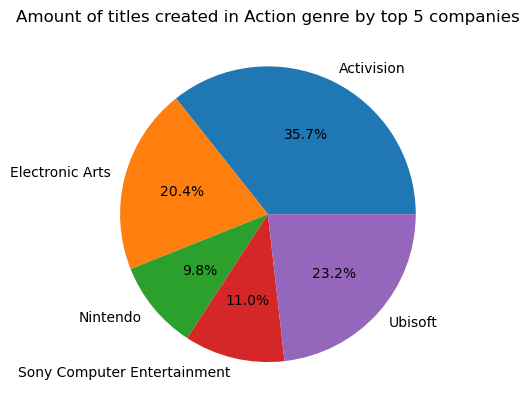

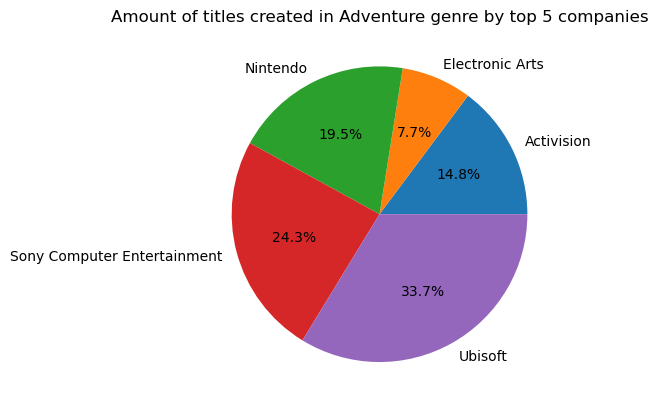

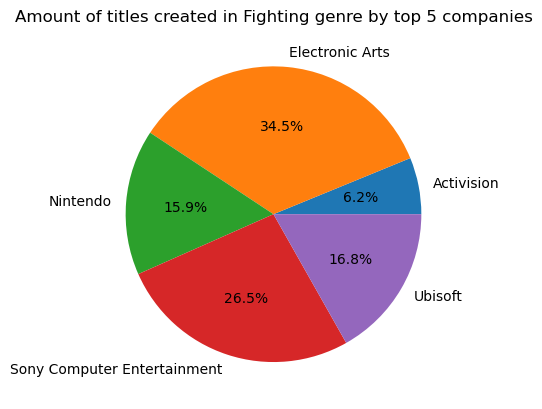

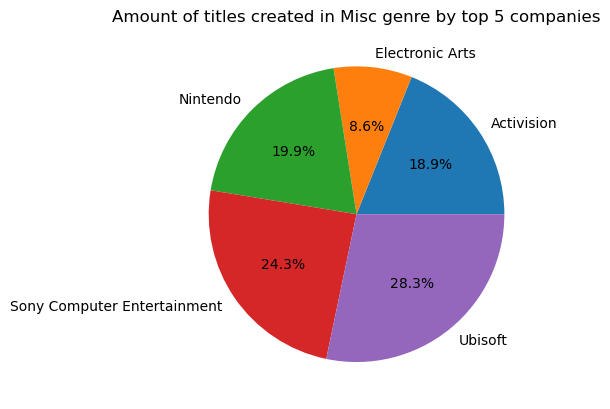

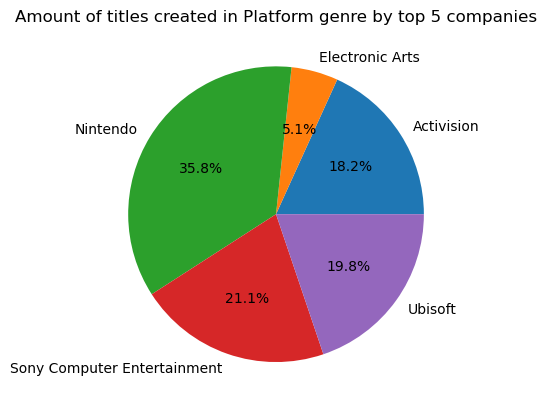

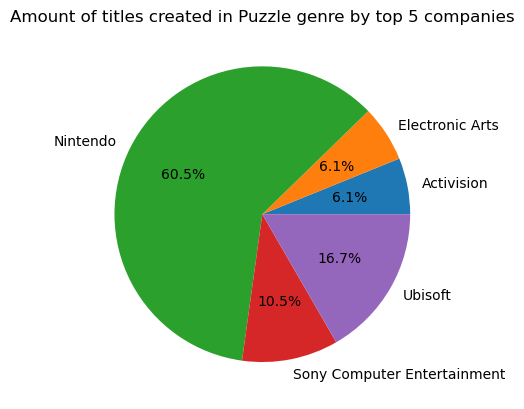

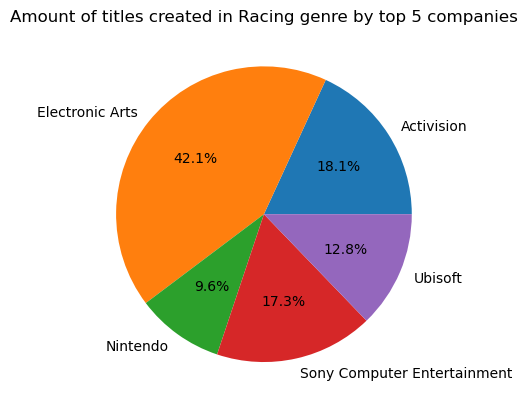

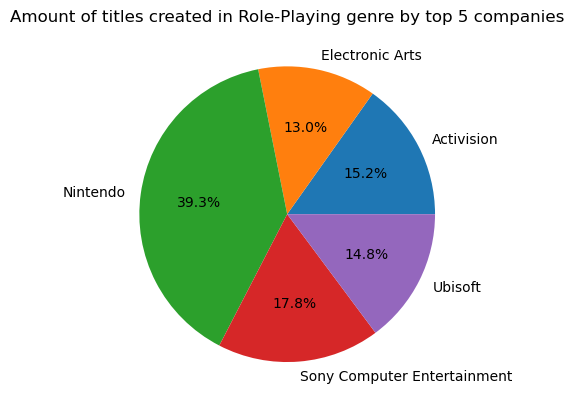

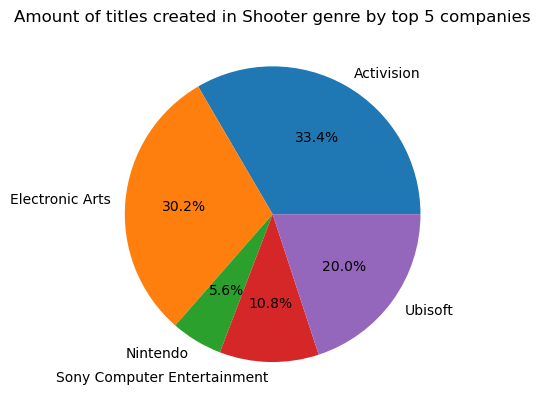

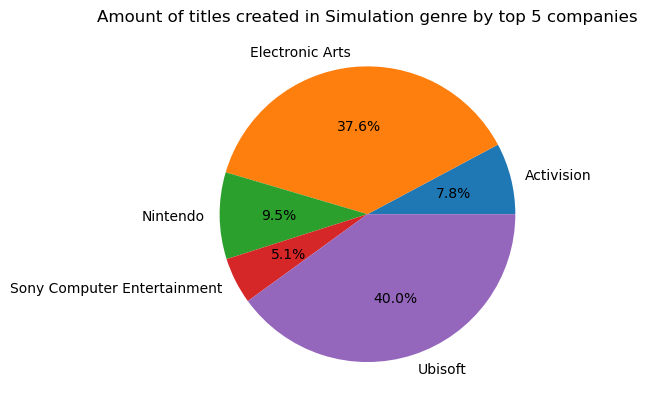

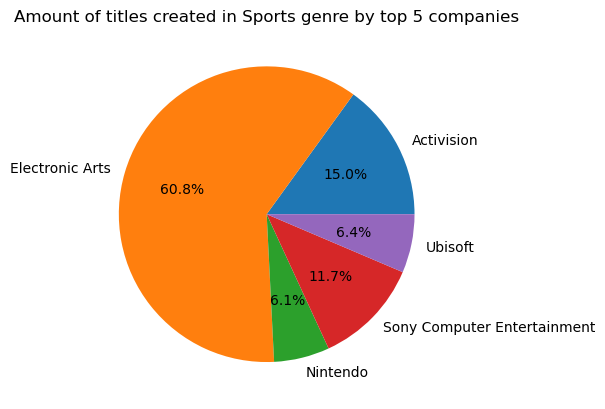

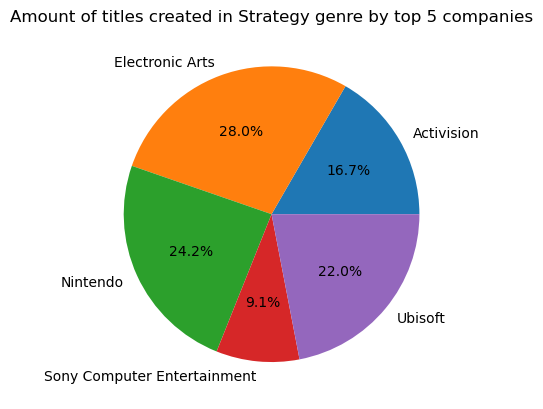

In [36]:
def GenresPublisherInfluenceCount(string):
    publishers = ['Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment', 'Ubisoft']
    temp = all_games[all_games['Publisher'].isin(publishers)]
    temp = temp[temp['Genre'] == string]
    grouped = temp.groupby('Publisher')['Rank'].count()
    plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%')
    plt.title(f'Amount of titles created in {string} genre by top 5 companies')
    plt.show()
    
grouped = all_games.groupby('Genre')
for rating, group in grouped:
    GenresPublisherInfluenceCount(rating)

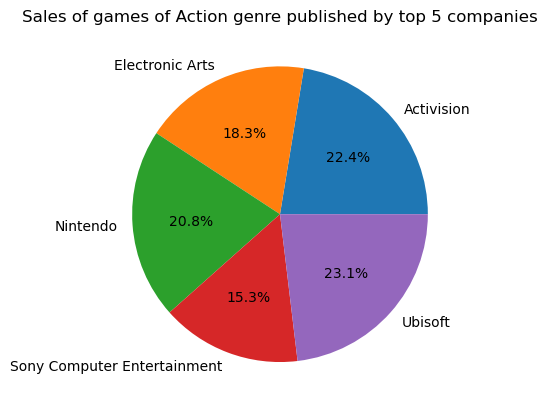

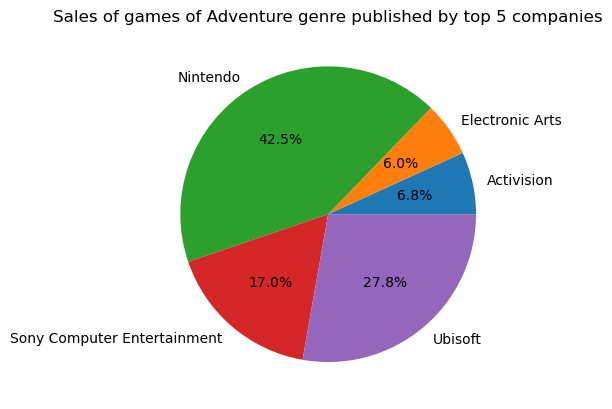

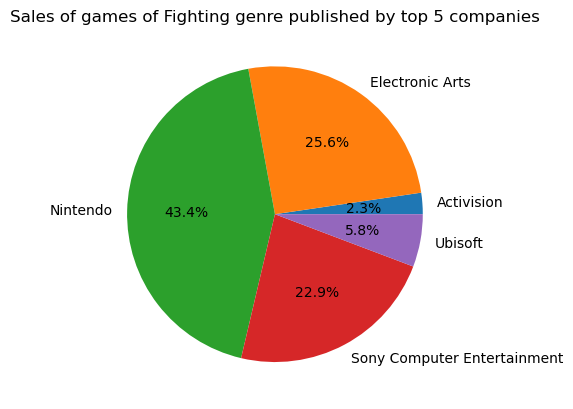

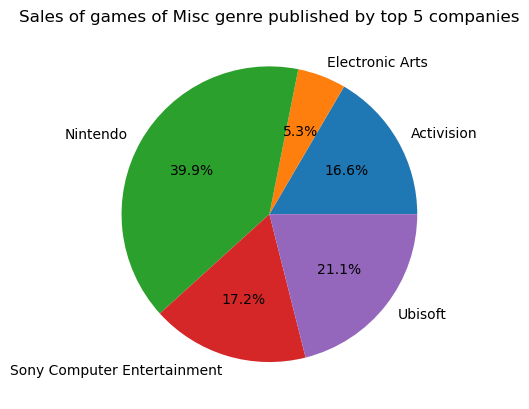

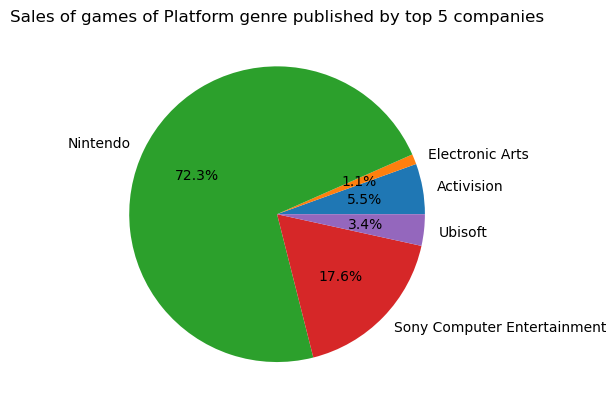

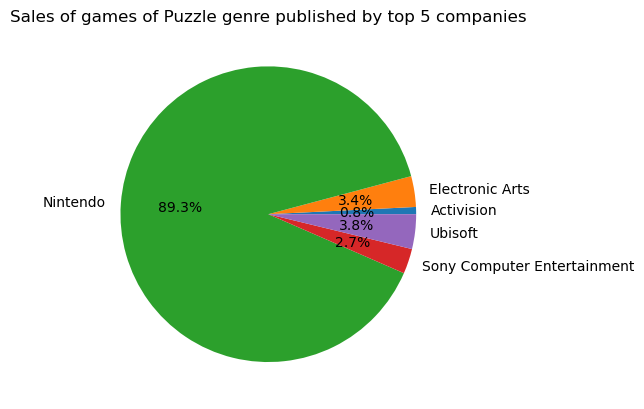

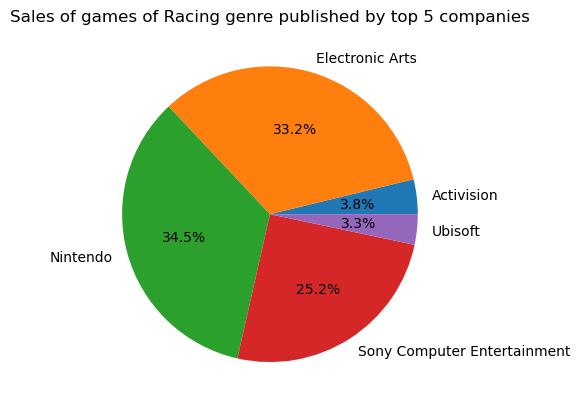

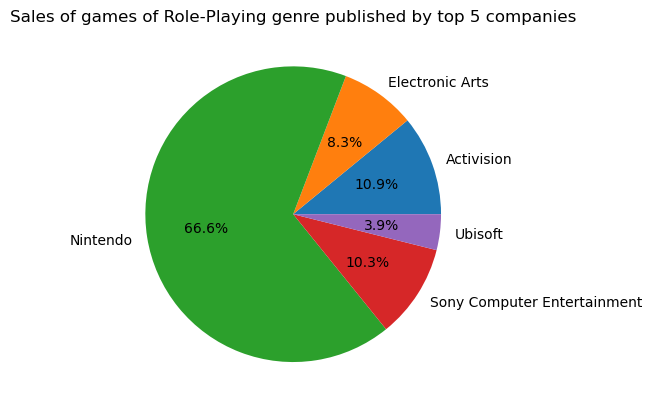

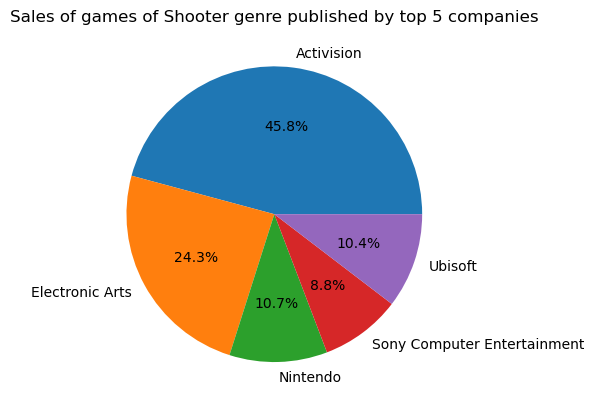

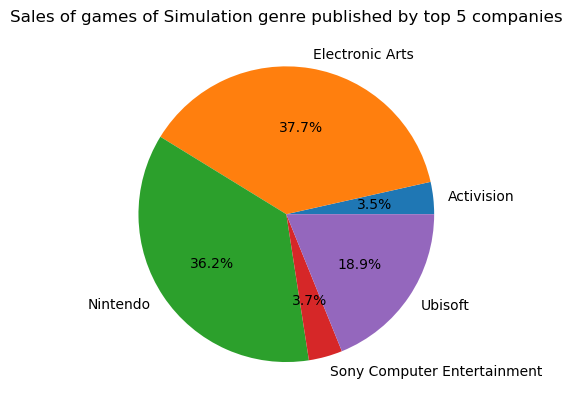

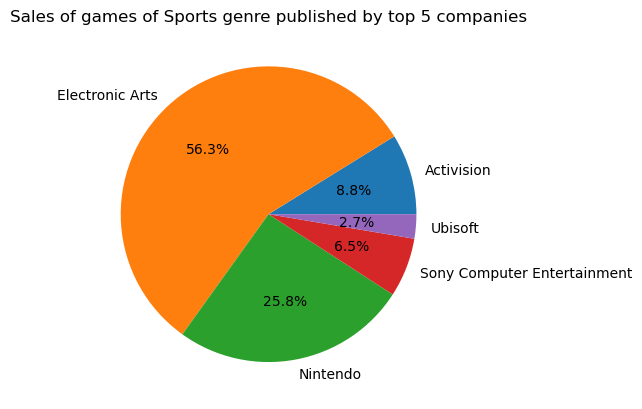

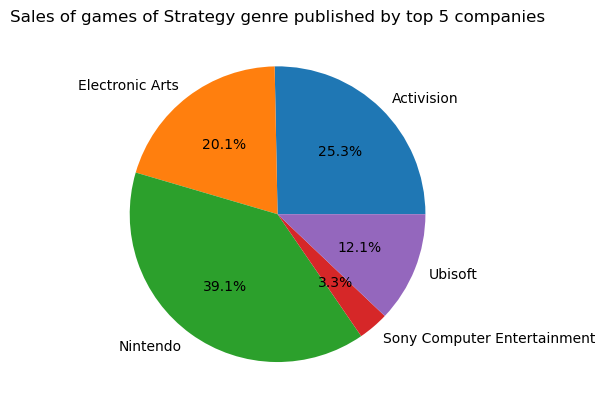

In [37]:
def GenresPublisherInfluence(string):
    publishers = ['Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment', 'Ubisoft']
    temp = all_games[all_games['Publisher'].isin(publishers)]
    temp = temp[temp['Genre'] == string]
    grouped = temp.groupby('Publisher')['Global_Sales'].sum()
    plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%')
    plt.title(f'Sales of games of {string} genre published by top 5 companies')
    plt.show()

grouped = all_games.groupby('Genre')
for rating, group in grouped:
    GenresPublisherInfluence(rating)

It is clear to say that companies do not have a spesification(They do not focus solidly only on a single genre). Although there are definetly genres that perfom the best for a spesific publisher. For instance Electronic Arts' big portion of games are based in the "Sport" genre, as well as for Activision it is "Action", they still tend to try out different games and perfom differently. But what could be the reasoning behind each of the companies success on the market? We can see that Electronic Arts has monopoly for "Sport" genre, and considering the market share of "Sport" it is safe to say that this monopoly has a great impact on the company's revenue.(NOTE: Electronic Arts have license for sport brands suchs as: FIFA, NBA, NFL, UFC and F1). EA (Electronic Arts) supplies "Racing" genre with an outstanding amount of games, taking up 42.1% of the games in this genre published, only such amount of titles help EA keep up with Nintendo. Having only 9.6% of all games developed in this genre Nintendo is a strong leader with 34.5% of sales share. By having a big share of the market EA has it's presence in "Simulation", "Strategy", "Fighting" and "Action". All of these except for "Simulation" and "Strategy" are big profit genres with high sales and big interest from players. 

On the opposite side there is Nintendo, whos published games are absolutely different genres. Nintendo has favorites such as: "Platform", "Role-Playing", "Misc" and "Puzzle", but these are still not the primary focus. Nintendo publishes the same amount of "Adventure" as "Racing", "Simulation" as "Shooter". Holding monopoly in "Puzzle" (one of the weakest genre by sales) and being the biggest player in "Platform" and "Role-Playing" Nintendo has the biggest sales across all the companies. With a small amount of games published Nintendo is an obvious leader of the market that outstands every single company by itself. How could a company achieve such heights without monopolyzation of strong fields? Could it be because of the fact that Nintendo is a home console manufacturer? (NOTE: First home console from Nintendo "Famicom" came out in 1983 and since then Nintendo has been a stable player on the home console market with the last console being Nintendo "Switch" from 2017)

At forth place in the rating comes Sony (Sony Computer Entertainment) who is also a big player on the home console market, falls very far behind Nintendo.(NOTE: First home console Sony "Playstation" came out in 1994 and since then Sony has been a stable player on the home console market with the last console being Sony "Playstation 5" from 2020. Sony "Playstation 2" holds the status of the most sold console ever with sales over 155 million consoles sold. Original "Playstation" and "Playstation 4" both sold more than 100 million units) Having adventage over Nintendo on console market, Sony's sales are but a third part of Nintendo's. Sony's games follow the same distribution as Nintendo with small changes. Genres are well spreaded with every single one, besides "Strategy", being well represented by Sony. Main focus of the company is "Misc" unlkie Nintendo, "Platform", "Action" and "Sport". Company comes close to Nintendo's sales only in "Action" and "Racing", although it has a bigger variety of titles to offer. But replicating Nintendo's path doesn't seem to help Sony with their sales, as well as holding a leader position on the home console market.

What stays behind Nintendo's success? They definetely do not try to take up the place in the market by producing as many games as possible, as we can see it is not the winning strategy. Could it be the target audience or it might be user rating for the games? 

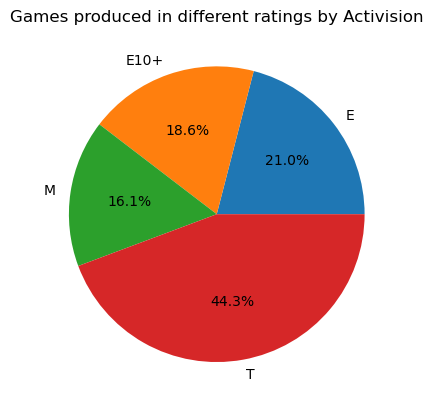

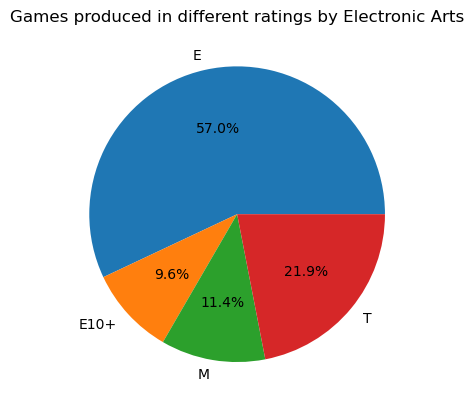

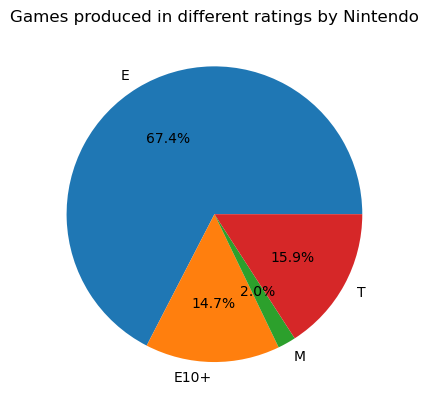

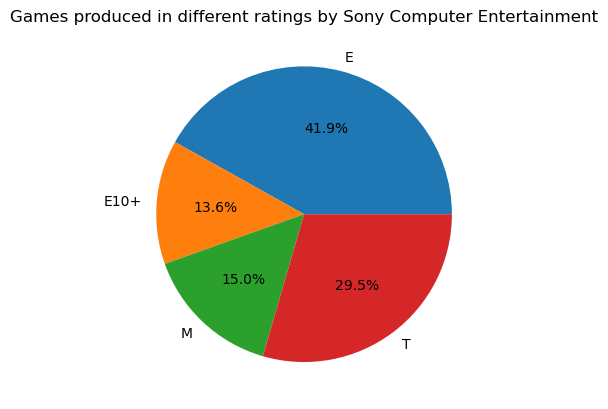

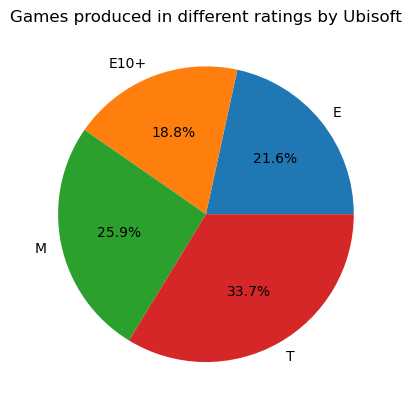

In [38]:
publishers = ['Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment', 'Ubisoft']
fivePublishers = all_games[all_games['Publisher'].isin(publishers)]
grouped = fivePublishers.groupby('Publisher')
for company, group in grouped:
    temp = fivePublishers[fivePublishers['Publisher'] == company]
    temp_group = temp.groupby('rating')['Rank'].count()
    #temp = temp.groupby('rating')['Rank'].count() / fivePublishers[fivePublishers['rating'].notna()].groupby('rating')['Rank'].count()
    plt.pie(temp_group, labels=temp_group.index, autopct='%1.1f%%')
    plt.title(f'Games produced in different ratings by {company}')
    plt.show()

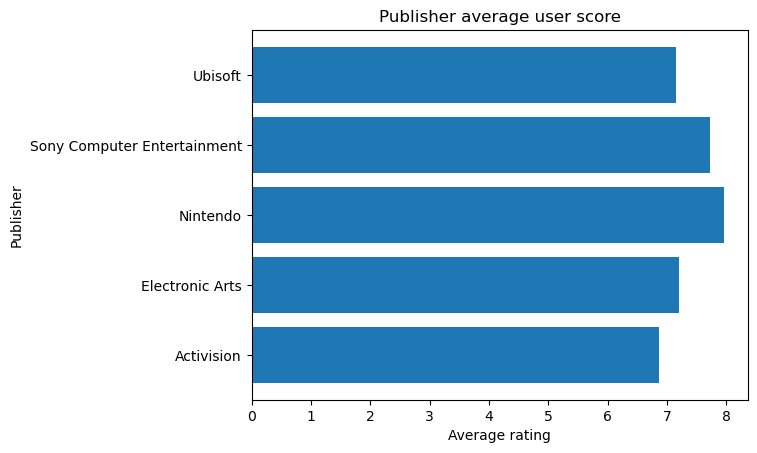

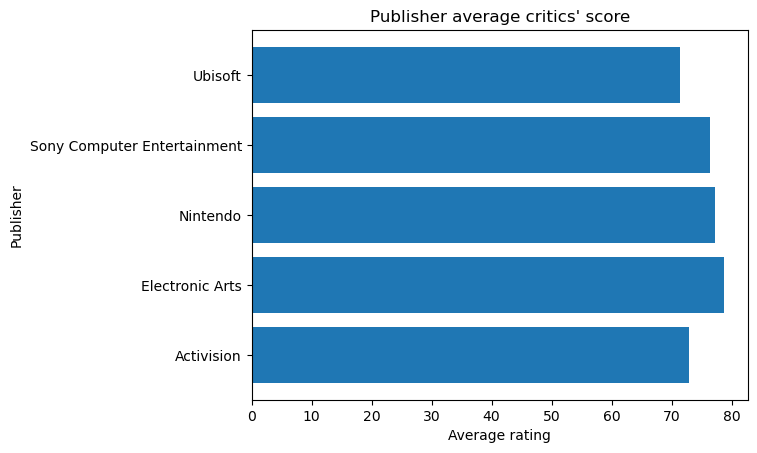

In [39]:
grouped = fivePublishers.groupby('Publisher')['user_score'].mean()
plt.barh( grouped.index,grouped) 
plt.ylabel('Publisher')
plt.xlabel('Average rating')
plt.title(f'Publisher average user score')
plt.show()

grouped = fivePublishers.groupby('Publisher')['metascore'].mean()
plt.barh( grouped.index,grouped) 
plt.ylabel('Publisher')
plt.xlabel('Average rating')
plt.title(f'Publisher average critics\' score')
plt.show()

As we can see once again that ratings do not affect the sales in any way: Nintedo's ratings from players are in the top, while EA and Activision are far behind, indeed they are the lowest from top 5 publishers, but both of them are in the top sales wise. Critics ratings have the same situation, but with a smaller range. The difference between ratings is unsignificant.

On the opposite side there is age rating. We have learned that age rating has a factor in sales and notice the pattern, that companies such as Nintendo and EA tend to focus primary on E rating, therefore once again it is proven that E rated games tend to bring more sales than others. Sony has a smaller precentage of E rated games than Nintendo and EA, but it is still a big part of the company's revenue. Lets focus now on Activision and Ubisoft. Both companies have a big revenue but they tend not to follow the trend of E rated games. These companies primary focus is T and M. As we have discovered before T rating is a very underperforming rating. Besides several titles that stand out in a top 100, the rating's sales are incredibly low. Therefore we can clearly understand that all of these companies have their T rated games in the top 100. So what could of lead to the success? It is safe to say for Activision that leadership in the "Shooter" genre has a significant effect on the publisher. As have been seen before "Shooter" is an impactful genre, leadership in which converts into huge sales numbers. At the same time Ubisoft, having mediocre perfomace throughout all categories, has an impact in "Action", "Adventure" and "Misc". All of these genres are mediocare as well as Ubisoft's perfomance comparing to the other 4 leaders.

## Results

**General Sales:**
 - Average sales were in the area of 500000 copies.
 - The biggest market is: North America. Having revenue almost twice bigger than Europe, 3.5 times revenue from Japan and 8 times other world.
 - Analysis was done with titles which sold more than 100000 copies and still most of the games have sold under a million copies. Million+ games are presented only from the big name companies and 10 million+ copies are outliers.
 
**Games reviews:**
 - Neither critics' nor users' reviews have influence on sales.

**Age rating:**
 - Age rating has a big influence on sales.
 - M rated games having a small share of the market perform the best in sales/amount of games.
 - E rating having a big competition still manages to perform above average.
 
**Genres:**
 - Genres go hand in hand with age ratings.
 - "Platform" genre is the strongest performer. 
 - "Strategy" has a big unused potential.
 
**Companies:**
 - Companies tend not to focus on on a single genre, although they still have favourites.
 - Monopolization of a genre with licensed content helps companies to outrun the competition.
 - Focus on a certain age rating helps perfomance of the company.
 
**General overview:** Video game market is huge with great sales perfomance. It has a lot of hidden patterns such as the fact that reviews do not influence sales, which is counterintuitive. At the same time games for mature audience tend to outperform games for everybody, although it has a smaller audience. It is a very deep field with controversial reasoning, which could lead to problems in the analysis. The biggest problem is the data: it has to be recent. We cannot get the data as soon as it updates, a lot of companies prefer not to share sales data and in a such fast growing market it is the key point. It is important to analyze the trends, being able to predict what will be popular and what will stay in the past. This paper is targeted at the overview of the video games sales history, patterns throughout the existence of the market.